# Dimensionality Reduction

### PCA 

In [3]:
import numpy as np

X = np.random.rand(1000, 3)
X_centered = X - X.mean(axis=0)

U, epsilon, Vt = np.linalg.svd(X_centered)

In [4]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print(c1)
print(c2)

[ 0.74633005 -0.64292522  0.17215871]
[-0.19722083 -0.46066814 -0.86538362]


In [5]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [7]:
pca.components_.T[:, 0]

array([ 0.74633005, -0.64292522,  0.17215871])

In [8]:
pca.explained_variance_ratio_

array([0.36317076, 0.33673079])

In [9]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [10]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

### PCA for MNIST - Reconstruction Error

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml(name='mnist_784', version=1, parser='auto', as_frame=False)

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

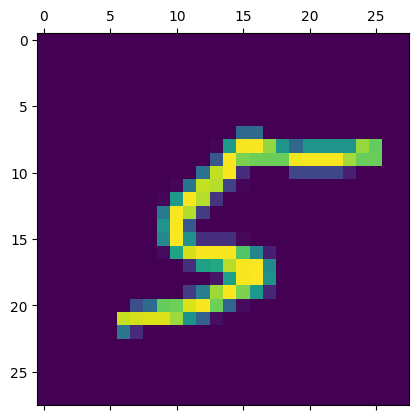

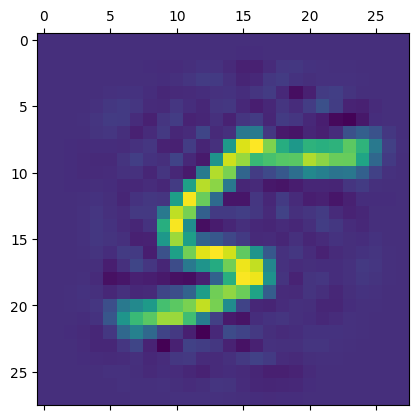

In [13]:
import matplotlib.pyplot as plt

digits = (X_train[0], X_recovered[0])

for d in digits:
    digit = d.reshape(28, 28)
    plt.matshow(digit)

In [14]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

In [15]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

### Kernel PCA

In [16]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=154, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_train[:1000])

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [20]:
print(grid_search.best_estimator_)

Pipeline(steps=[('kpca', KernelPCA(gamma=0.03, kernel='rbf', n_components=2)),
                ('log_reg', LogisticRegression())])


### LLE

In [45]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000)

In [46]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

## Exercise - MNIST

In [47]:
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9724

In [63]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf2.fit(X_train_reduced, y_train)

y_pred = rf_clf2.predict(X_test)
accuracy_score(y_test, y_pred)
